In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, BatchNormalization, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
# Loading CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# Normalizing inputs
x_train = x_train/255
x_test = x_test/255

In [8]:
# Noise (normal distribution) addition function with mean=0.0 and std=0.1
def noise_addition(image):
    noise = np.random.normal(loc=0.0, scale=0.1, size=image.shape)
    image = image + noise
    image = np.clip(image, 0., 1.)
    return image    

In [9]:
noisy_x_train = noise_addition(x_train)
noisy_x_test = noise_addition(x_test)

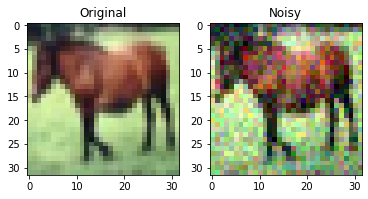

In [10]:
# Displaying original and noisy image from the dataset
index = 7
plt.subplot(1, 2, 1)
plt.imshow(x_train[index])
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(noisy_x_train[index])
plt.title('Noisy')
plt.show()

In [11]:
# Defining model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2DTranspose(filters=256, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2DTranspose(filters=128, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2DTranspose(filters=3, kernel_size=3, strides=1, padding='same', activation='sigmoid'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)         2

In [21]:
# Training

checkpoint = ModelCheckpoint('best_model.h5', verbose=1, save_best_only=True, save_weights_only=True)

model.fit(noisy_x_train, x_train, validation_data=(noisy_x_test, x_test), epochs=40, batch_size=128, callbacks=[checkpoint])

Epoch 1/40
 92/391 [======>.......................] - ETA: 3:09 - loss: 0.0122 - accuracy: 0.6040

KeyboardInterrupt: 

In [28]:
import tensorflow as tf
print( tf.__version__)

2.2.0
